# Project 2: NYC Taxi Rides
# Part 2: EDA, Visualization, Feature Engineering

In this part, we will conduct EDA on the NYC Taxi dataset that we cleaned and train/validation split in part 1. We will also guide you through the engineering of some features that hopefully will help our model to accurately understand the data.


# Imports

Let us start by loading the Python libraries and custom tools we will use in this part.  

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

sns.set(style="whitegrid", palette="muted")
%matplotlib inline

## Loading & Formatting data

The following code loads the data into a pandas DataFrame.

In [2]:
# Run this cell to load the data. 
data_file = Path("data/part1", "cleaned_data.hdf")
train_df = pd.read_hdf(data_file, "train")

In [3]:
train_df.head()

,record_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
16434,8614300,2,2016-01-21 17:37:12,2016-01-21 18:37:56,2,10.89,-73.863403,40.769432,1,N,...,40.688210,1,41.5,1.0,0.5,6.00,0.0,0.3,49.30,3644.0
21929,7230200,2,2016-01-29 23:22:26,2016-01-29 23:31:23,2,1.00,-74.008087,40.739365,1,N,...,40.729271,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,537.0
3370,9830300,2,2016-01-05 18:50:16,2016-01-05 18:56:00,2,0.56,-73.972923,40.755650,1,N,...,40.758469,1,5.0,1.0,0.5,1.00,0.0,0.3,7.80,344.0
21975,7251500,2,2016-01-30 00:14:34,2016-01-30 00:47:13,1,6.65,-73.992027,40.718662,1,N,...,40.661118,1,25.5,0.5,0.5,2.68,0.0,0.3,29.48,1959.0
13758,6168000,1,2016-01-18 13:25:24,2016-01-18 13:38:51,1,2.10,-73.953125,40.784538,1,N,...,40.760792,2,11.5,0.0,0.5,0.00,0.0,0.3,12.30,807.0


## 1: Data Overview 

As a reminder, the raw taxi data contains the following columns:
- `recordID`: primary key of this database
- `VendorID`: a code indicating the provider associated with the trip record
- `passenger_count`: the number of passengers in the vehicle (driver entered value)
- `trip_distance`: trip distance
- `tpep_dropoff_datetime`: date and time when the meter was engaged
- `tpep_pickup_datetime`: date and time when the meter was disengaged
- `pickup_longitude`: the longitude where the meter was engaged
- `pickup_latitude`: the latitude where the meter was engaged
- `dropoff_longitude`: the longitude where the meter was disengaged
- `dropoff_latitude`: the latitude where the meter was disengaged
- `duration`: duration of the trip in seconds
- `payment_type`: the payment type
- `fare_amount`: the time-and-distance fare calculated by the meter
- `extra`: miscellaneous extras and surcharges
- `mta_tax`: MTA tax that is automatically triggered based on the metered rate in use	
- `tip_amount`: the	amount of credit card tips, cash tips are not included
- `tolls_amount`: amount paid for tolls
- `improvement_surcharge`: fixed fee
- `total_amount`: total amount paid by passengers, cash tips are not included

Let us take a closer look at the target `duration` variable. In the cell below, we plot its distribution using `sns.distplot`. This should give us an idea about whether we have some outliers in our data.

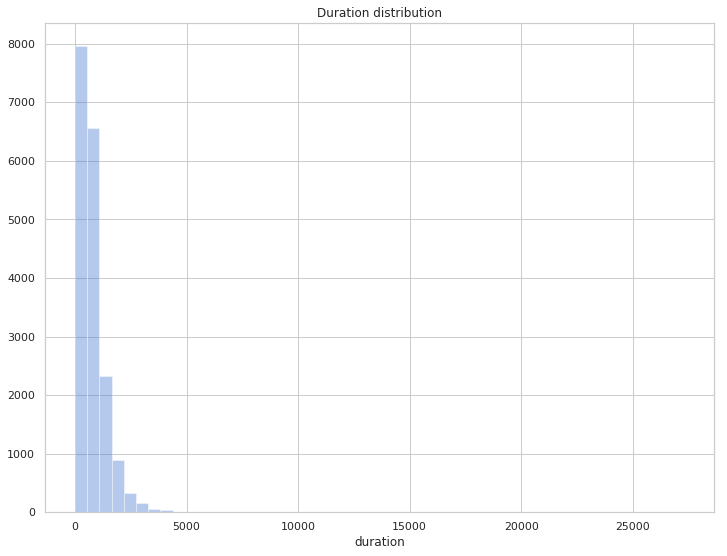

In [4]:
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the distribution of duration using sns.distplot
# You can fill `ax=ax` to sns.distplot to plot in the ax object created above

sns.distplot(train_df['duration'], ax=ax, kde=False)

plt.title('Duration distribution');

As expected for a positive valued variable, we observe a skewed distribution. Note that we seem to have a handful of very long trips within our data. Use an appropriate data transformation to squeeze this highly-skewed distribution. Plot a `sns.distplot` of the transformed duration data for `train_df`.

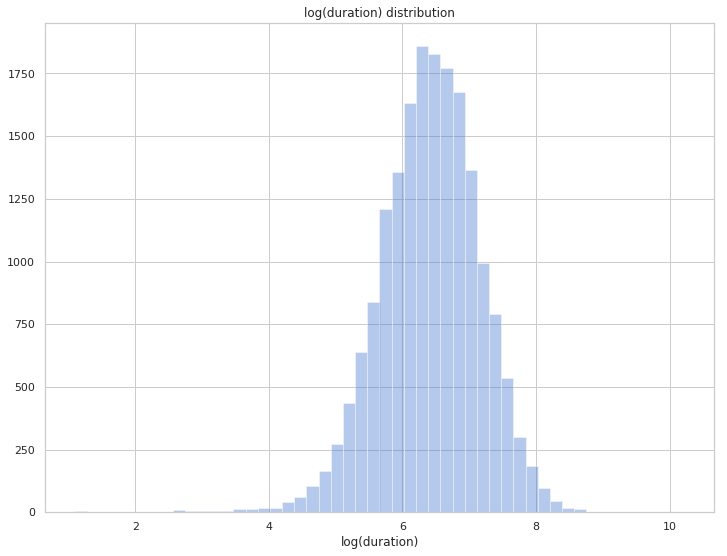

In [5]:
fig, ax = plt.subplots(figsize=(12, 9))

# Use a log transformation to squeeze the distribution
# You can add + 1 to all values before taking the log to handle possible 0 values for distribution

sns.distplot(np.log(train_df['duration'] + 1),
             ax=ax,
             axlabel='log(duration)',
             kde=False)

plt.title('log(duration) distribution');

After transforming our data, we should immediately observe that we are dealing with what seems to be log-normal distribution for the target variable `duration`. We can see the behavior of shorter rides better, whereas before they were lumped in a bar near 0. This is a nice result, since it can facilitate modeling later. 

**Note:** Keep in mind that we want to avoid peeking at our validation data because it may introduce bias. Therefore, we will be focusing on analyzing the training data for the remainder of this notebook.

## 2: Date Analysis

In order to understand the general pattern/trends of our taxi ride data, we will plot the number of taxi rides requested over time. Please run the following cell.

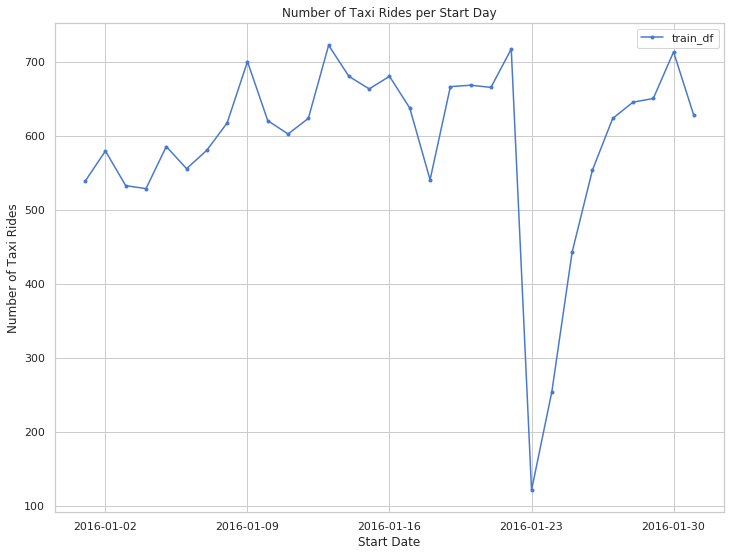

In [6]:
plt.figure(figsize=(12, 9))

# Make a temporary copy of our datasets
tmp_train = train_df.copy()
tmp_train['date'] = tmp_train['tpep_pickup_datetime'].dt.date
tmp_train = tmp_train.groupby('date').count()['pickup_longitude']

# Plot the temporal overlap
plt.plot(tmp_train, '.-', label='train_df')

plt.title('Number of Taxi Rides per Start Day')
plt.xlabel("Start Date")
plt.legend()
plt.ylabel('Number of Taxi Rides');

### Question 2a
Taking a closer look at the plot above, we notice a drastic drop in taxi rides towards the end of Janurary.
What is the date corresponding to the lowest number of taxi rides? Enter your answer as a string in the format MM-DD-YYYY.

In [7]:
lowest_rides_date = "MM-DD-YYYY"

### BEGIN SOLUTION
lowest_rides_date = r"""01-23-2016"""
### END SOLUTION

print(lowest_rides_date)

01-23-2016


In [8]:
# Hidden test!
### BEGIN HIDDEN TESTS
assert lowest_rides_date == "01-23-2016"
### END HIDDEN TESTS

### Question 2b
What event could have caused this drop in taxi rides? Feel free to use Google.

In [9]:
q2b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q2b_answer = r"""

There was a massive blizzard January 22nd to January 24th, 2016.

"""
### END SOLUTION

print(q2b_answer)



There was a massive blizzard January 22nd to January 24th, 2016.




## 3. Spatial/Locational Analysis

We are curious about the distribution of taxi pickup/dropoff coordinates. We also may be interested in observing whether this distribution changes as we condition of longer/shorter taxi rides. In the cells below, we will categorize our data into long and short rides based on duration. Then we will plot the latitude and longitude coordinates of rides conditioned on these categories.

First you may want to familiarize yourself with a [map of Manhattan](https://www.google.com/maps/place/Manhattan,+New+York,+NY/@40.7590402,-74.0394431,12z/data=!3m1!4b1!4m5!3m4!1s0x89c2588f046ee661:0xa0b3281fcecc08c!8m2!3d40.7830603!4d-73.9712488).

Here we split `train_df` into two data frames, one called `short_rides` and one called `long_rides`. `short_rides` should contain all rides less than or equal to 15 minutes and `long_rides` should contain rides more than 15 minutes. 

**Note:** We chose 15 minutes because the mean duration of a ride is roughly 700 seconds ~ 12 minutes. We then round up to the nearest nice multiple of 5. Note that you should adjust how you determine short/long rides and outliers when feature engineering.

In [10]:
short_rides = train_df[train_df["duration"] <= 900] # rides less than or equal to 15 mins
long_rides = train_df[train_df["duration"] > 900] # rides more than 15 minutes

In [11]:
assert len(short_rides) == 12830
assert len(long_rides) == 5524

Below we generate 4 scatter plots. The scatter plots are ordered as follows:

* ax1: plot the __start__ location of short duration rides
* ax2: plot the __start__ location of long duration rides
* ax3: plot the __end__ location of short duration rides
* ax4: plot the __end__ location of long duration rides

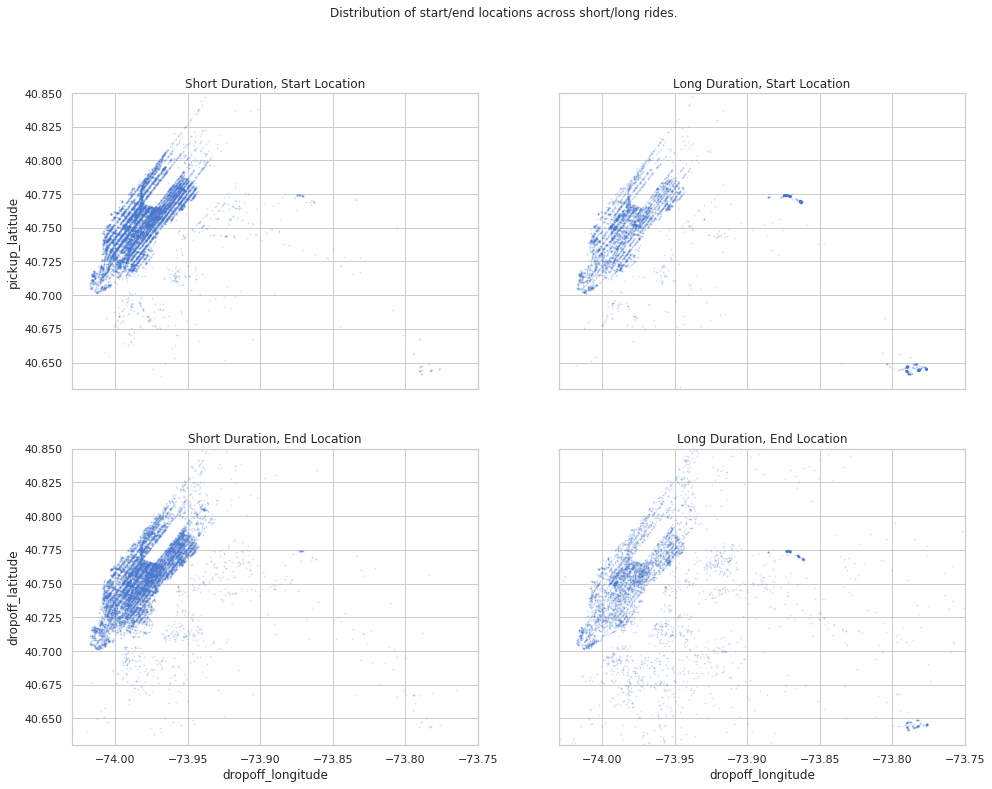

In [12]:
# Set random seed of reproducibility
random.seed(42)

# City boundaries
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Define figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows = 2, figsize=(16, 12), sharex=True, sharey=True)
alpha = 0.15 # make sure to include these as an argument
s = 1 # make sure to include this as an argument

short_rides.plot(kind = "scatter", x = "pickup_longitude", y = "pickup_latitude",
                     ax = ax1, alpha = alpha, s = s, title='Short Duration, Start Location')
long_rides.plot(kind = "scatter", x = "pickup_longitude", y = "pickup_latitude",
                    ax = ax2, alpha = alpha, s = s, title='Long Duration, Start Location')
short_rides.plot(kind = "scatter", x = "dropoff_longitude", y = "dropoff_latitude",
                     ax = ax3, alpha = alpha, s = s , title='Short Duration, End Location')
long_rides.plot(kind = "scatter", x = "dropoff_longitude", y = "dropoff_latitude",
                    ax = ax4, alpha = alpha, s = s, title='Long Duration, End Location')


fig.suptitle('Distribution of start/end locations across short/long rides.')


plt.ylim(city_lat_border)
plt.xlim(city_long_border);

### Question 3a

What do the plots above look like? 

In particular:
- Find what the following circled regions correspond to:
<img src="figs/nyc_locations.png" width="50%"></img>

**Hint: Here is a [page](https://www.google.com/maps/place/Manhattan,+New+York,+NY/@40.7590402,-74.0394431,12z/data=!3m1!4b1!4m5!3m4!1s0x89c2588f046ee661:0xa0b3281fcecc08c!8m2!3d40.7830603!4d-73.9712488) that may be useful.**

In [13]:
q3a_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q3a_answer = r"""

It is a map of the New York Region. The three regions are Manhattan, Central Park and LaGuardia Airport.

"""
### END SOLUTION

print(q3a_answer)



It is a map of the New York Region. The three regions are Manhattan, Central Park and LaGuardia Airport.




### Question 3b
In each scatter plot above, why are there no points contained within the small rectangular region (towards the top left between the blue points)? Could this be an error/mistake in our data?

In [14]:
q3b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q3b_answer = r"""

This is not a mistake. The rectangle in Manhattan is Central Park. 
Makes sense why there are less pickups/dropoffs there.

"""
### END SOLUTION

print(q3b_answer)



This is not a mistake. The rectangle in Manhattan is Central Park. 
Makes sense why there are less pickups/dropoffs there.




### Question 3c
What observations/conclusions do you make based on the scatter plots above? In particular, how are trip duration and pickup/dropoff location related?

In [15]:
q3c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q3c_answer = r"""

Long trips tend to end at LaGuardia Airport more than short trips do. The end location of short trips are generally 
centralized around Manhattan, while there is more spread in end location for long trips.

"""
### END SOLUTION

print(q3c_answer)



Long trips tend to end at LaGuardia Airport more than short trips do. The end location of short trips are generally 
centralized around Manhattan, while there is more spread in end location for long trips.




This confirms that the trips are localized in NYC, with a very strong concentration in Manhattan **and** on the way to LaGuardia Airport. This might give you ideas of relevant features for feature engineering.  

Another way to visualize ride coordinates is using a **heat map** (this also helps us avoid overplotting). The following plots count the number of trips for NYC neighborhoods and areas, plotting with the `geopandas` package and theses [shapefiles](https://geo.nyu.edu/catalog/nyu_2451_36743) (do not mind the values on the colorbar). If you are curious about how to create the figures below, feel free to check out [`geopandas`](http://geopandas.org/).

![neighborhoods](figs/chloro_NY_neighborhoods.png)
![neighborhoods](figs/chloro_NY_taxi_zones.png)

## 4: Temporal features
We can utilize the `start_timestamp` column to design a lot of interesting features.

We implement the following temporal (related to time) features using the `add_time_columns` function below.
- `month` derived from `start_timestamp`.
- `week_of_year` derived from `start_timestamp`.
- `day_of_month` derived from `start_timestamp`.
- `day_of_week` derived from `start_timestamp`.
- `hour` derived from `start_timestamp`.
- `week_hour` derived from `start_timestamp`.

**Note 1**: You can use the `dt` attribute of the `start_timestamp` column to convert the entry into a `DateTime` object.

**Note 2**: We set `df.is_copy = False` to explicitly write back to the original dataframe, `df`, that is being passed into the `add_time_columns` function. Otherwise `pandas` will complain.

In [16]:
def add_time_columns(df):
    """
    Add temporal features to df
    """
    df.is_copy = False 
    df.loc[:, 'month'] = df['tpep_pickup_datetime'].dt.month
    df.loc[:, 'week_of_year'] = df['tpep_pickup_datetime'].dt.weekofyear
    df.loc[:, 'day_of_month'] = df['tpep_pickup_datetime'].dt.day
    df.loc[:, 'day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
    df.loc[:, 'hour'] = df['tpep_pickup_datetime'].dt.hour
    df.loc[:, 'week_hour'] = df['tpep_pickup_datetime'].dt.weekday * 24 + df['hour']
 
    # No real need to return here, but we harmonize with remove_outliers for later pipelinezation
    return df

In [17]:
# Note that we are applying this transformation to train_df, short_rides and long_rides
train_df = add_time_columns(train_df)
short_rides = add_time_columns(short_rides)
long_rides = add_time_columns(long_rides)

In [18]:
train_df[['month', 'week_of_year', 'day_of_month', 'day_of_week', 'hour', 'week_hour']].head()

,month,week_of_year,day_of_month,day_of_week,hour,week_hour
16434,1,3,21,3,17,89
21929,1,4,29,4,23,119
3370,1,1,5,1,18,42
21975,1,4,30,5,0,120
13758,1,3,18,0,13,13


Your `train_df.head()` should look like this, although the ordering of the data in `id` might be different:
![time_columns](figs/time_columns.png)

In [19]:
time_columns = ['month',
                'week_of_year',
                'day_of_month',
                'day_of_week',
                'hour',
                'week_hour']


# Check columns were created
assert all(column in train_df.columns for column in time_columns)

# Check type
assert train_df[time_columns].dtypes.nunique() == 1

assert train_df[time_columns].dtypes.nunique() == 1

### Visualizing Temporal Features

### Question 4a
Let us now use the features we created to plot some histograms and visualize patterns in our dataset. We will analyze the distribution of the number of taxi rides across months and days of the week. This can help us visualize and understand patterns and trends within our data.

This is a open ended question. Create 2 plots that visualize temporal information from our dataset. At least one of them must visualize the hour of each day. Aside from that you can use any column from `time_columns`. 

You can use the same column multiple times, but if the plots are redundant you will not receive full credit. This will be graded based on how informative each plot is and how "good" the visualization is (remember what good/bad visualizations look like for different kinds of data!).  

#### Visualization 1

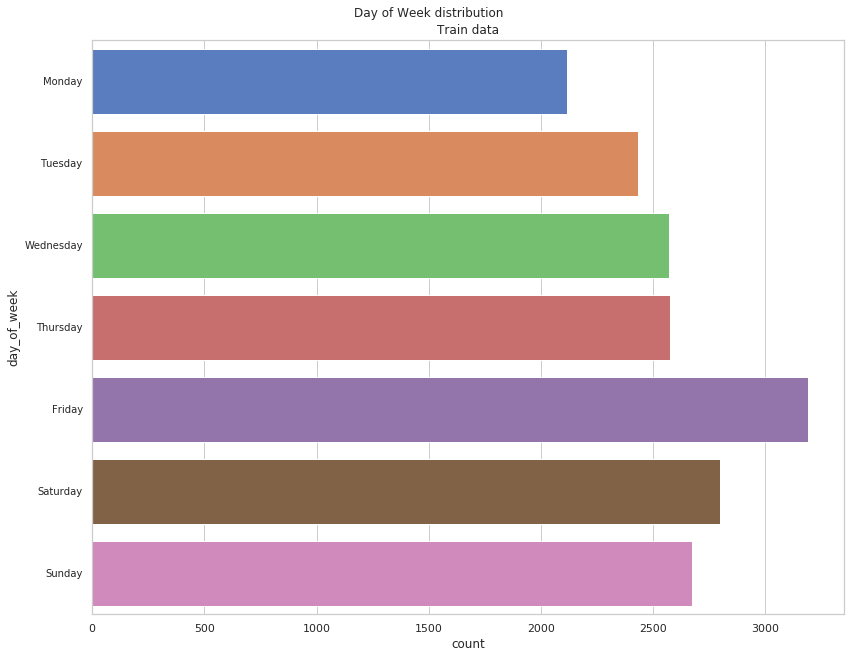

In [20]:
# Visualization 1
### BEGIN SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(12, 9))
sns.countplot(y='day_of_week', data=train_df, ax=axes);

axes.set_title('Train data')
axes.set_yticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation='horizontal', fontsize=10)

fig.suptitle('Day of Week distribution', y=1.01);
plt.tight_layout();
### END SOLUTION

#### Visualization 2

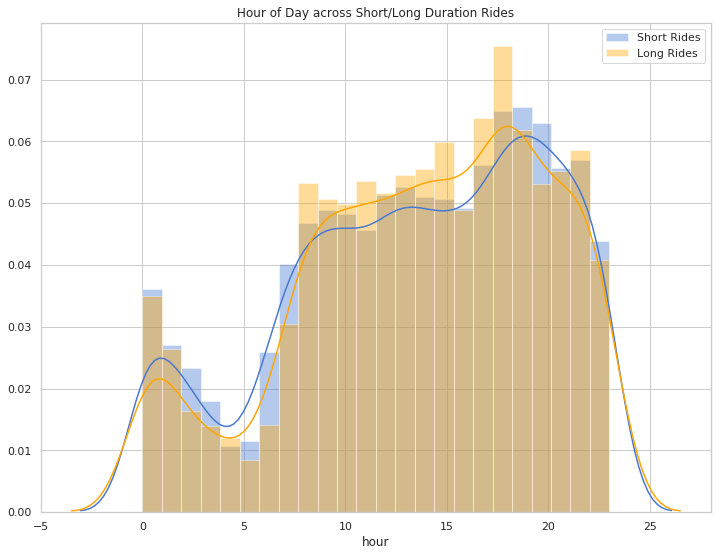

In [21]:
# Visualization 2
### BEGIN SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(12, 9))
sns.distplot(short_rides['hour'], bins=24, ax = axes, label = "Short Rides");
sns.distplot(long_rides['hour'], bins=24, color = "orange", ax  = axes, label = "Long Rides");
axes.set_title('Hour of Day across Short/Long Duration Rides')
plt.legend();
### END SOLUTION

### Question 4b
Briefly explain for each plot
1. What feature you're visualization
2. Why you chose this feature
3. Why you chose this visualization method

In [22]:
q4b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
### END SOLUTION

print(q4b_answer)



Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below




### Question 4c

From the various plots above, what conclusions can you draw about the temporal aspects of our data? How does this relate to duration? 

In [23]:
q4c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
### END SOLUTION

print(q4c_answer)



Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below




### Question 4d

Previously, we have analyzed the temporal features `hour` and `day_of_week` independently, but these features may in fact have a relationship between each other. Determining the extent to their relationship may be useful in helping us create new features in our model. Create a violin plot that displays distribution of rides over each hour per day of the week.

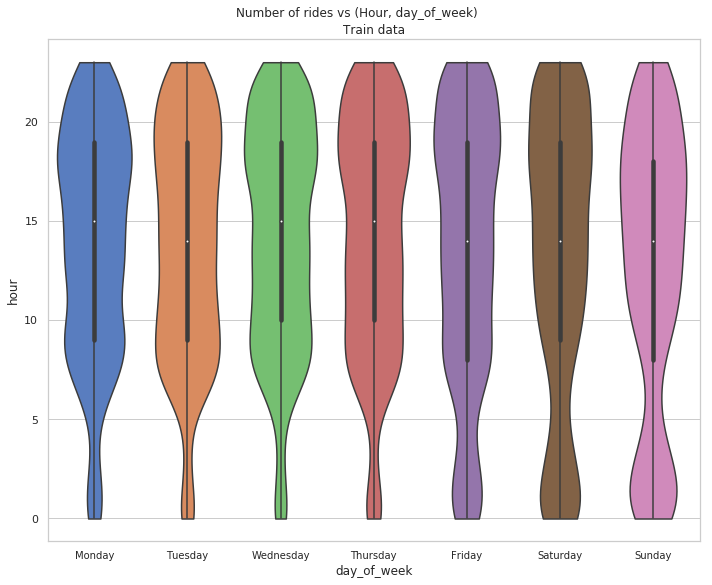

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


### BEGIN SOLUTION
sns.violinplot(y='hour', x='day_of_week', data=train_df, ax=axes, cut=0);
axes.set_title('Train data')
axes.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation='horizontal', fontsize=10)
fig.suptitle('Number of rides vs (Hour, day_of_week)', y=1.01);
### END SOLUTION

plt.tight_layout();

### Question 4e
Do you notice anything interesting about your visualization? How would you explain this plot to a lay person? What are the features/patterns of interest?

In [25]:
q4e_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q4e_answer = r"""

Your graph should show an interesting property: 
the weekend (Fri evening, Sat, Sun) have more trips late at night which can most likely be attributed to the contrast between NYC business days and weekend night life.
This relationship between day of the week and hour might be useful in creating features for our model.

"""
### END SOLUTION

print(q4e_answer)



Your graph should show an interesting property: 
the weekend (Fri evening, Sat, Sun) have more trips late at night which can most likely be attributed to the contrast between NYC business days and weekend night life.
This relationship between day of the week and hour might be useful in creating features for our model.




## 5: Vendors

Recall that in Part 1, we found that there are only two unique vendors represented in the dataset. We may wonder if the vendor feature can be useful when trying to understand taxi ride duration.

### Question 5a
Visualize the VendorID feature. Create at least one plot that gives insight as to whether this feature would be useful or not in our model.

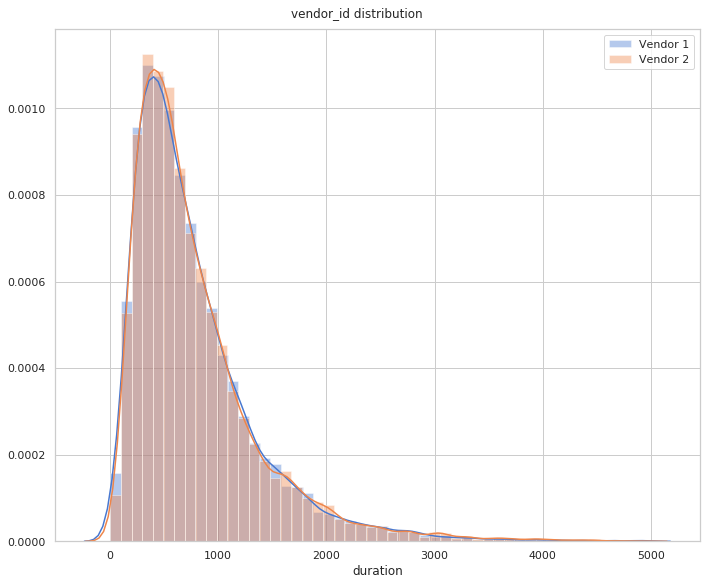

In [26]:
# Visualization

### BEGIN SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

vendor_1 = train_df[(train_df["VendorID"] == 1) & (train_df["duration"] <5000)]
vendor_2 = train_df[(train_df["VendorID"] == 2) & (train_df["duration"] <5000)]
sns.distplot(vendor_1["duration"], label="Vendor 1")
sns.distplot(vendor_2["duration"], label="Vendor 2")

fig.suptitle('vendor_id distribution', y=1.01)
plt.legend()
plt.tight_layout();
### END SOLUTION

### Question 5b
Justify why you chose this visualization method and how it helps determine whether `vendor_id` is useful in our model or not.

In [27]:
q5b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
### END SOLUTION

print(q5b_answer)



Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below




### Question 5c
From the plot above, do you think vendor_id will help us understand duration? Why or why not?

In [28]:
q5c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q5c_answer = r"""

No because the duration distributions are the same; 
hence, this variable does not capture differences in duration as well as other variables might.

"""
### END SOLUTION

print(q5c_answer)



No because the duration distributions are the same; 
hence, this variable does not capture differences in duration as well as other variables might.




## 6: Distance features

We can also use the coordinates information to compute distance features.  This will allow us to compute speed related features.  
We will compute the [haversine](https://en.wikipedia.org/wiki/Haversine_formula) distance, the [manhattan](https://en.wikipedia.org/wiki/Taxicab_geometry) distance and the [bearing](http://www.mathsteacher.com.au/year7/ch08_angles/07_bear/bearing.htm) angle.

In [29]:
# These functions are implemented for you
def haversine(lat1, lng1, lat2, lng2):
    """
    Compute haversine distance
    
    The haversine formula determines the great-circle distance between two points 
    on a sphere given their longitudes and latitudes. Important in navigation, it 
    is a special case of a more general formula in spherical trigonometry, 
    the law of haversines, that relates the sides and angles of spherical triangles.
    """
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    average_earth_radius = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * average_earth_radius * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    """
    Computes Manhattan distance
    
    The name alludes to the grid layout of most streets on the island of Manhattan, 
    which causes the shortest path a car could take between two intersections in the borough 
    to have length equal to the intersections' distance in taxicab geometry.
    """
    a = haversine(lat1, lng1, lat1, lng2)
    b = haversine(lat1, lng1, lat2, lng1)
    return a + b

def bearing(lat1, lng1, lat2, lng2):
    """
    Compute the bearing, or angle, from (lat1, lng1) to (lat2, lng2).
    A bearing of 0 refers to a NORTH orientation.
    """
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [30]:
def add_distance_columns(df):
    df.loc[:, 'manhattan'] = manhattan_distance(lat1=df['pickup_latitude'],
                                                lng1=df['pickup_longitude'],
                                                lat2=df['dropoff_latitude'],
                                                lng2=df['dropoff_longitude'])

    df.loc[:, 'bearing'] = bearing(lat1=df['pickup_latitude'],
                                   lng1=df['pickup_longitude'],
                                   lat2=df['dropoff_latitude'],
                                   lng2=df['dropoff_longitude'])
    df.loc[:, 'haversine'] = haversine(lat1=df['pickup_latitude'],
                                   lng1=df['pickup_longitude'],
                                   lat2=df['dropoff_latitude'],
                                   lng2=df['dropoff_longitude'])
    
    return df

In [31]:
train_df = add_distance_columns(train_df)
short_rides = add_distance_columns(short_rides)
long_rides = add_distance_columns(long_rides)

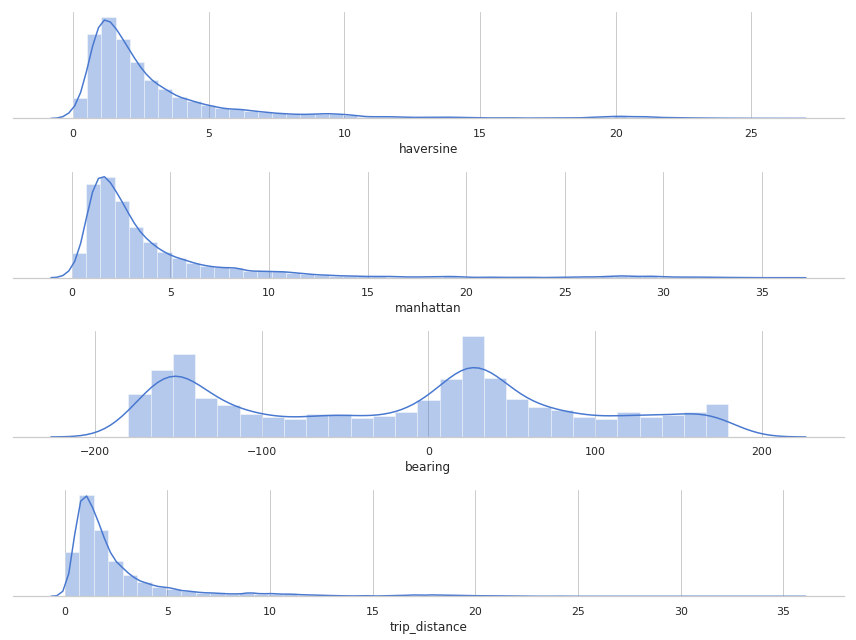

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(12, 9))
sns.distplot(train_df['haversine'], ax=axes[0], axlabel='haversine');
sns.distplot(train_df['manhattan'], ax=axes[1], axlabel='manhattan');
sns.distplot(train_df['bearing'], ax=axes[2], axlabel='bearing');
sns.distplot(train_df['trip_distance'], ax=axes[3], axlabel='trip_distance');

sns.despine(left=True);
plt.setp(axes, yticks=[]);
plt.tight_layout();


### Question 6a

The `bearing` direction is angle, the initial direction of the trip.  
The bearing direction has two prominent peaks around 30 and -150 degrees.  
**Can you relate these peaks to the orientation of Manhattan? What do you notice about these angles?**

**Hint:** This [wikipedia article](https://en.wikipedia.org/wiki/Commissioners%27_Plan_of_1811) has the answer, although it may take some digging. Alternatively, try to look at a map of Manhattan.

In [33]:
q6a_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q6a_answer = r"""

30 degrees and -150 degrees describe the vertical orientation of Manhattan. 
Since most rides are within Manhattan, the bearing angle tends to align with the orientation borough. 
Notice that the degree values are also 180 degrees apart; 
this signifies that taxi rides generally head up Manhattan or down Manhattan.

"""
### END SOLUTION

print(q6a_answer)



30 degrees and -150 degrees describe the vertical orientation of Manhattan. 
Since most rides are within Manhattan, the bearing angle tends to align with the orientation borough. 
Notice that the degree values are also 180 degrees apart; 
this signifies that taxi rides generally head up Manhattan or down Manhattan.




### Question 6b

For haversine and manhattan distances, it is probably more helpful to look at the log distribution. We are also curious about whether these distance features can help us understand duration. Create at least one plot that compares haversine and manhattan distances and gives insight as to whether this would be a useful feature in our model.

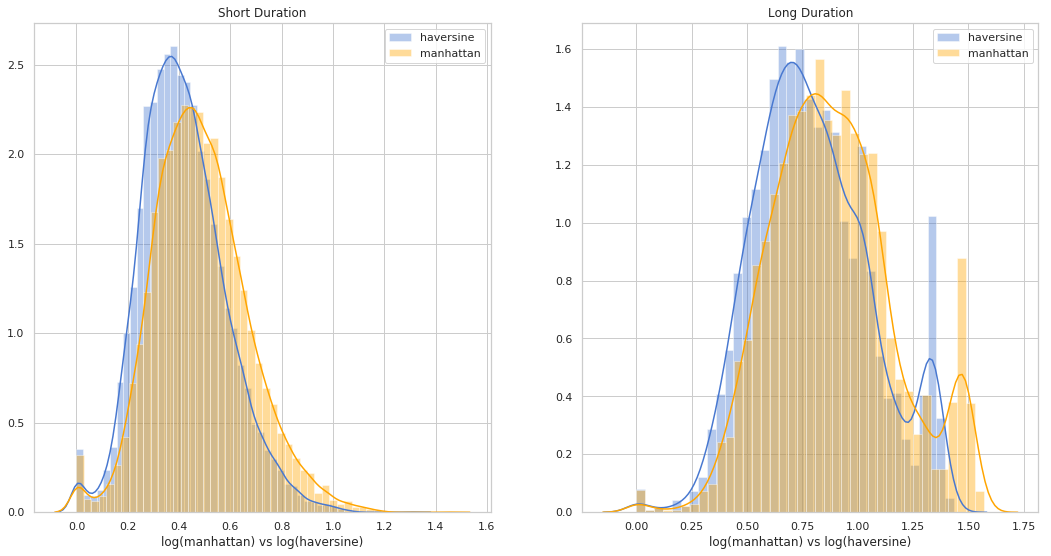

In [34]:
# Visualization
### BEGIN SOLUTION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
sns.distplot(np.log10(short_rides['haversine'].values + 1),
             ax=ax1, label='haversine');
sns.distplot(np.log10(short_rides['manhattan'].values + 1),
             ax=ax1, label='manhattan',
             axlabel='log(manhattan) vs log(haversine)', color = "orange");
sns.distplot(np.log10(long_rides['haversine'].values + 1),
             ax=ax2, label='haversine');
sns.distplot(np.log10(long_rides['manhattan'].values + 1),
             ax=ax2, label='manhattan',
             axlabel='log(manhattan) vs log(haversine)', color = "orange");
ax1.set_title("Short Duration")
ax2.set_title("Long Duration")
ax1.legend()
ax2.legend();
### END SOLUTION

### Question 6c
Justify why you chose this visualization method and how it helps inform you about using manhattan/haversine distance as a feature for predicting trip duration.

In [35]:
q6c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
### END SOLUTION

print(q6c_answer)



Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below




### Question 6d
Fill in the code below to plot a scatter plot of manhattan distance vs duration.

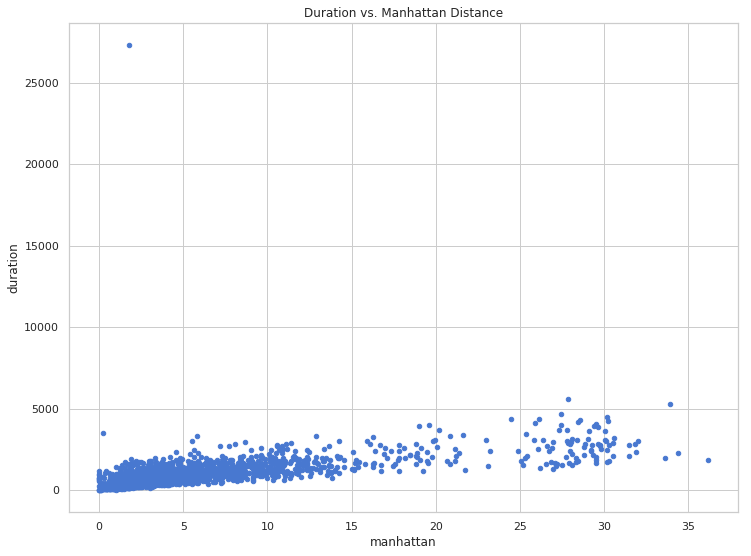

In [36]:
### BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(12, 9))
sample = train_df.sample(len(train_df)//5)
sample.plot(kind='scatter', x='manhattan', y='duration', ax=ax);
ax.set_title("Duration vs. Manhattan Distance");
### END SOLUTION

### Question 6e

According to the plot above, there are a few outliers in both duration and manhattan distance. **Which type of outliers is most likely to be a mistake in our data?**

In [37]:
q6e_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q6e_answer = r"""

The outliers in distance are most likely a mistake because you cannot violate the laws of physics (ie. travel large distances in too short amount of time).
The outliers in duration are possible, especially in stand-still traffic or if the taxi driver left the meter on.

"""
### END SOLUTION

print(q6e_answer)



The outliers in distance are most likely a mistake because you cannot violate the laws of physics (ie. travel large distances in too short amount of time).
The outliers in duration are possible, especially in stand-still traffic or if the taxi driver left the meter on.




## 7: Advanced features
You do not need to incorporate these features into your model, although it may help lower your error. You are required to read through this portion and respond to the questions. All of the code is provided, please skim through it and try to understand what each cell is doing.

### Clustering
[Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) is the task of grouping objects such that members within each group are more similar to each other than members of other groups. Clustering is a powerful tool used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics. Recall cluster sampling, which we learned earlier in the semester. We will use a simple clustering method (clustering by spatial locality) to reveal some more advanced features.

### Speed features

For `train_df`, we have the `duration` and now some distance information.  
This is enough for us to compute average speed and try to better understand our data.   

For `test_df`, we cannot use `duration` as a feature because it is what we are trying to predict. One clever way to include speed information for modeling would be as follows:

1. Cluster the observations in `train_df` by rounding the latitude and longitudes.
2. Compute the average speed per pickup cluster and dropoff cluster.
3. Match each observation in `test_df` to its pickup cluster and dropoff cluster based off the latitude and longitude, thus assigning the average speed for the pickup and dropoff cluster.
4. We have added speed information as features for `test_df`.

Therefore, we have propagated information computed in the `train_df` into the `test_df` via clustering. This is not something we will do in this notebook, although you can try it for yourself!

Other information that could be added based on clustering (both pickup cluster and dropoff cluster):
- Average of `avg_speed_h` per cluster.
- Average of `duration` per cluster.
- Average of `avg_speed_h` per cluster and hour.
- Average of `duration` per cluster and hour.
- In-cluster flow of trips for 60 min period.
- Out-cluster flow of trips for 60 min period.

In [38]:
# Calculate average manhattan speed
train_df['avg_speed_m'] = 1000 * train_df['manhattan'] / train_df['duration']
train_df['avg_speed_m'] = train_df['avg_speed_m'][train_df['avg_speed_m'] < 100]
train_df['avg_speed_m'].fillna(train_df['avg_speed_m'].median(), inplace=True)

In [39]:
train_df['avg_speed_m'].describe()

count    18354.000000
mean         5.210825
std          2.883174
min          0.000000
25%          3.287328
50%          4.617264
75%          6.413992
max         59.225577
Name: avg_speed_m, dtype: float64

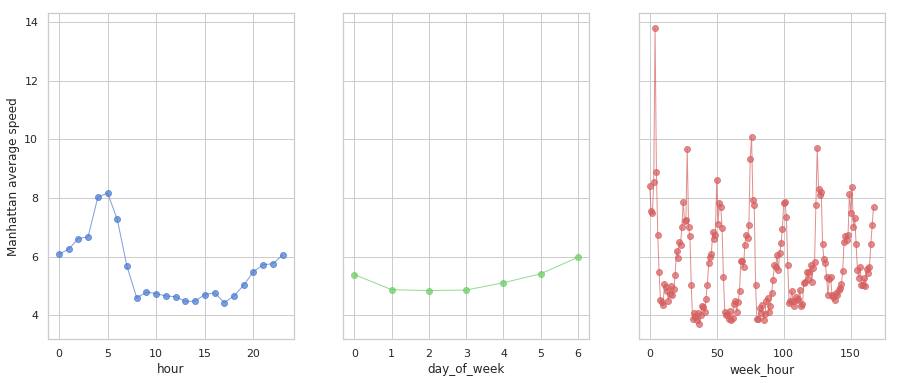

In [40]:
# Visualize average manhattan speed by hour, day of week and week hour
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharey=True)

axes[0].plot(train_df.groupby('hour').mean()['avg_speed_m'], 'bo-', lw=1, alpha=0.7)
axes[1].plot(train_df.groupby('day_of_week').mean()['avg_speed_m'], 'go-', lw=1, alpha=0.7)
axes[2].plot(train_df.groupby('week_hour').mean()['avg_speed_m'], 'ro-', lw=1, alpha=0.7)

axes[0].set_xlabel('hour')
axes[1].set_xlabel('day_of_week')
axes[2].set_xlabel('week_hour')
axes[0].set_ylabel('Manhattan average speed');

### Question 7a
Based off of these visualizations, provide 2-3 insights on the average speed.

In [41]:
q7a_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q7a_answer = r"""

It seems people in rides are traveling faster on the weekend and on a Monday than during the rest of the week.
It seems people in rides are traveling faster on the earling morning hours than during the rest of the day.
"""
### END SOLUTION

print(q7a_answer)



It seems people in rides are traveling faster on the weekend and on a Monday than during the rest of the week.
It seems people in rides are traveling faster on the earling morning hours than during the rest of the day.



We are now going to visualize the average speed per region. Here we define regions as a very basic classical clustering based on rounding of spatial coordinates.

In [42]:
# Round / bin the latitude and longitudes
train_df['start_lat_bin'] = np.round(train_df['pickup_latitude'], 3)
train_df['start_lng_bin'] = np.round(train_df['pickup_longitude'], 3)

# Average speed for regions
gby_cols = ['start_lat_bin', 'start_lng_bin']

coord_stats = (train_df.groupby(gby_cols)
               .agg({'avg_speed_m': 'mean', 'manhattan': 'count'})
               .reset_index())

coord_stats = coord_stats[coord_stats['manhattan'] > 10]

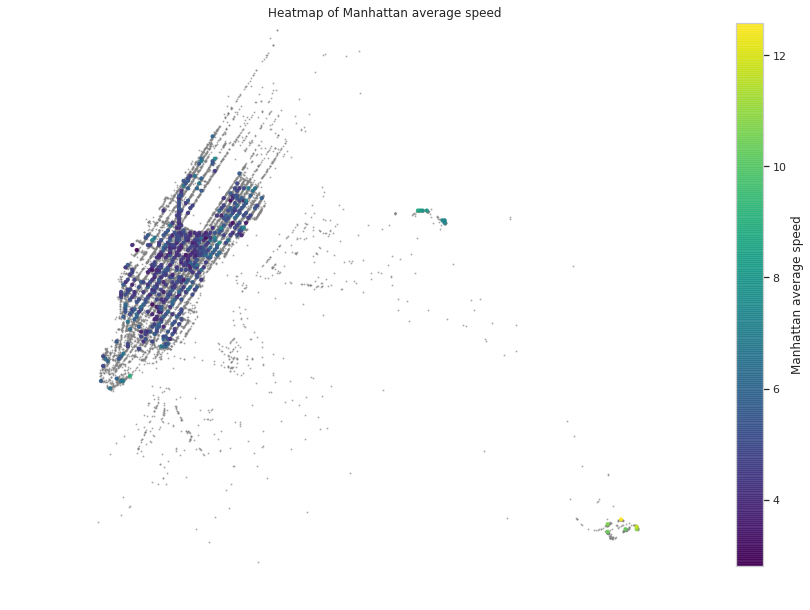

In [43]:
# Visualize the average speed per region
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

scatter_trips = ax.scatter(train_df['pickup_longitude'].values,
                           train_df['pickup_latitude'].values,
                           color='grey', s=1, alpha=0.5)

scatter_cmap = ax.scatter(coord_stats['start_lng_bin'].values,
                          coord_stats['start_lat_bin'].values,
                          c=coord_stats['avg_speed_m'].values,
                          cmap='viridis', s=10, alpha=0.9)

cbar = fig.colorbar(scatter_cmap)
cbar.set_label("Manhattan average speed")
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Heatmap of Manhattan average speed')
plt.axis('off');

### Question 7b
In 2-3 sentences, describe how we can use the clustering visualization above to gain insight on the speed. Do you think spatial clustering would be useful in reducing the error of our model?

In [44]:
q7b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q7b_answer = r"""

We observe that our basic region clustering gives insights on the speed:
- rides are in average much slower in Manhattan itself (congestion).
- rides are usually faster on the way to LaGuardia Airport (highway).

The highway/congestion explanation seems reasonable, and this graph indicates once again 
that spatial clustering can yield powerful explanatory features for our dataset.  
"""
### END SOLUTION

print(q7b_answer)



We observe that our basic region clustering gives insights on the speed:
- rides are in average much slower in Manhattan itself (congestion).
- rides are usually faster on the way to LaGuardia Airport (highway).

The highway/congestion explanation seems reasonable, and this graph indicates once again 
that spatial clustering can yield powerful explanatory features for our dataset.  



## Part 2 Exports
We are not requiring you to export anything from this notebook, but you may find it useful to do so. There is a space below for you to export anything you wish.

In [45]:
Path("data/part2").mkdir(parents=True, exist_ok=True)
data_file = Path("data/part2", "data_part2.hdf") # Path of hdf file
...

Ellipsis

## Part 2 Conclusions 

We now have a good understanding of the taxi data we are working with.
Visualizing large amounts of data can be a difficult task. One helpful tool is [datashader](https://github.com/bokeh/datashader), a data rasterization pipeline for automating the process of creating meaningful representations of large amounts of data. Using the [geopandas](http://geopandas.org/) package also makes working with geospatial data easier. We encourage you to explore these tools if you are interested in learning more about visualization!

Within our taxi data set, we have explored different features and their relationship with ride duration. Now, we are ready to incorporate more data in order to add to our set of features.

**Please proceed to part 3 where we will be engineering more features and building our models using a processing pipeline.**